**Dataset: SGEMM (Single precision GEneral Matrix Multiply) GPU Kernel Performance**

**A Project by:**

**Anish Samanta**

**Artificial Intelligence and Data Science**

**08519011921** 

<b>Data Set Information:</b>

This data set measures the running time of a matrix-matrix product A*B = C, where all matrices have size 2048 x 2048, using a parameterizable SGEMM GPU kernel with 241600 possible parameter combinations. For each tested combination, 4 runs were performed and their results are reported as the 4 last columns. All times are measured in milliseconds*.

There are 14 parameter, the first 10 are ordinal and can only take up to 4 different powers of two values, and the 4 last variables are binary. Out of 1327104 total parameter combinations, only 241600 are feasible (due to various kernel constraints). This data set contains the results for all these feasible combinations.

The experiment was run on a desktop workstation running Ubuntu 16.04 Linux with an Intel Core i5 (3.5GHz), 16GB RAM, and a NVidia Geforce GTX 680 4GB GF580 GTX-1.5GB GPU. We use the 'gemm_fast' kernel from the automatic OpenCL kernel tuning library 'CLTune' ([Web Link]).


<b>Attribute Information</b>

- Independent variables:
1-2. MWG, NWG: per-matrix 2D tiling at workgroup level: {16, 32, 64, 128} (integer)
3. KWG: inner dimension of 2D tiling at workgroup level: {16, 32} (integer)
4-5. MDIMC, NDIMC: local workgroup size: {8, 16, 32} (integer)
6-7. MDIMA, NDIMB: local memory shape: {8, 16, 32} (integer)
8. KWI: kernel loop unrolling factor: {2, 8} (integer)
9-10. VWM, VWN: per-matrix vector widths for loading and storing: {1, 2, 4, 8} (integer)
11-12. STRM, STRN: enable stride for accessing off-chip memory within a single thread: {0, 1} (categorical)
13-14. SA, SB: per-matrix manual caching of the 2D workgroup tile: {0, 1} (categorical)

- Output:
15-18. Run1, Run2, Run3, Run4: performance times in milliseconds for 4 independent runs using the same parameters. They range between 13.25 and 3397.08.

https://archive.ics.uci.edu/ml/datasets/SGEMM+GPU+kernel+performance

### Importing necessary libraries,

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, r2_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ML Project/sgemm+gpu+kernel+performance/sgemm_product.csv",sep=",")
df.head()


,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms)
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,115.26,115.87,118.55,115.80
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.13,78.25,79.25,79.19
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,79.84,80.69,80.76,80.97
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,84.32,89.90,86.75,85.58
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,115.13,121.98,122.73,114.81


In [ ]:
df.tail()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms)
241595,128,128,32,32,32,32,32,8,4,4,1,0,1,1,17.96,17.77,17.77,17.77
241596,128,128,32,32,32,32,32,8,4,4,1,1,0,0,36.04,36.03,36.04,36.03
241597,128,128,32,32,32,32,32,8,4,4,1,1,0,1,35.28,34.82,35.27,35.27
241598,128,128,32,32,32,32,32,8,4,4,1,1,1,0,28.43,28.49,28.44,28.45
241599,128,128,32,32,32,32,32,8,4,4,1,1,1,1,17.94,17.79,17.77,17.77


**Data Pre-processing**

### Since we have 4 column of runtime, we will merge all the column into a new column named "Runtime" which will have mean of the four individual runtime

In [ ]:
#creating Runtime, target variable by taking average of Run1, Run2, Run3, Run4
df['Runtime']=df[['Run1 (ms)','Run2 (ms)','Run3 (ms)','Run4 (ms)']].mean(axis=1)
df=df.drop(columns =['Run1 (ms)','Run2 (ms)','Run3 (ms)','Run4 (ms)'], axis = 1)

In [ ]:
#drop other Run time variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241600 entries, 0 to 241599
Data columns (total 15 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   MWG      241600 non-null  int64  
 1   NWG      241600 non-null  int64  
 2   KWG      241600 non-null  int64  
 3   MDIMC    241600 non-null  int64  
 4   NDIMC    241600 non-null  int64  
 5   MDIMA    241600 non-null  int64  
 6   NDIMB    241600 non-null  int64  
 7   KWI      241600 non-null  int64  
 8   VWM      241600 non-null  int64  
 9   VWN      241600 non-null  int64  
 10  STRM     241600 non-null  int64  
 11  STRN     241600 non-null  int64  
 12  SA       241600 non-null  int64  
 13  SB       241600 non-null  int64  
 14  Runtime  241600 non-null  float64
dtypes: float64(1), int64(14)
memory usage: 27.6 MB


By looking at above information, we can make sure that there are no null values in the dataset.

In [ ]:
df.isnull().sum()

MWG        0
NWG        0
KWG        0
MDIMC      0
NDIMC      0
MDIMA      0
NDIMB      0
KWI        0
VWM        0
VWN        0
STRM       0
STRN       0
SA         0
SB         0
Runtime    0
dtype: int64

### df.describe method gives us the necessary statistics information of all the available features in the dataset

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MWG,241600.0,80.415364,42.469220,16.0000,32.0000,64.00,128.0000,128.0000
NWG,241600.0,80.415364,42.469220,16.0000,32.0000,64.00,128.0000,128.0000
KWG,241600.0,25.513113,7.855619,16.0000,16.0000,32.00,32.0000,32.0000
MDIMC,241600.0,13.935894,7.873662,8.0000,8.0000,8.00,16.0000,32.0000
NDIMC,241600.0,13.935894,7.873662,8.0000,8.0000,8.00,16.0000,32.0000
MDIMA,241600.0,17.371126,9.389418,8.0000,8.0000,16.00,32.0000,32.0000
NDIMB,241600.0,17.371126,9.389418,8.0000,8.0000,16.00,32.0000,32.0000
KWI,241600.0,5.000000,3.000006,2.0000,2.0000,5.00,8.0000,8.0000
VWM,241600.0,2.448609,1.953759,1.0000,1.0000,2.00,4.0000,8.0000
VWN,241600.0,2.448609,1.953759,1.0000,1.0000,2.00,4.0000,8.0000


### Below is the boxplot of runtime column, which is our target variable. Using boxplot we can easily know about the outliers and where our most data lies.

<Axes: >

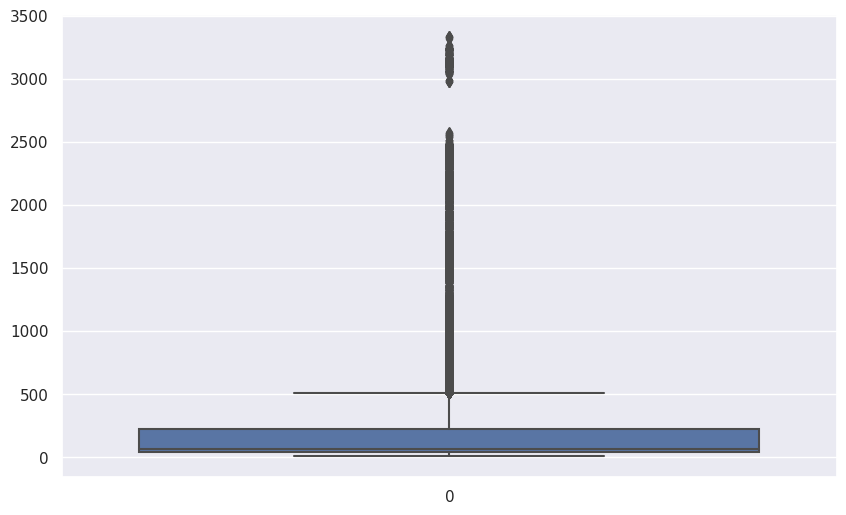

In [ ]:
#checking for outliers
plt.figure(figsize=(10,6))
sns.boxplot(df['Runtime'])

In [ ]:
df.Runtime.quantile([0.25,0.5,0.75])

0.25     40.6675
0.50     69.7900
0.75    228.3875
Name: Runtime, dtype: float64

From the above boxplot, we can notice that the our first 3 quratiles are 40, 70 and 229 respectively. But some of our values reach to the far end of 3500.

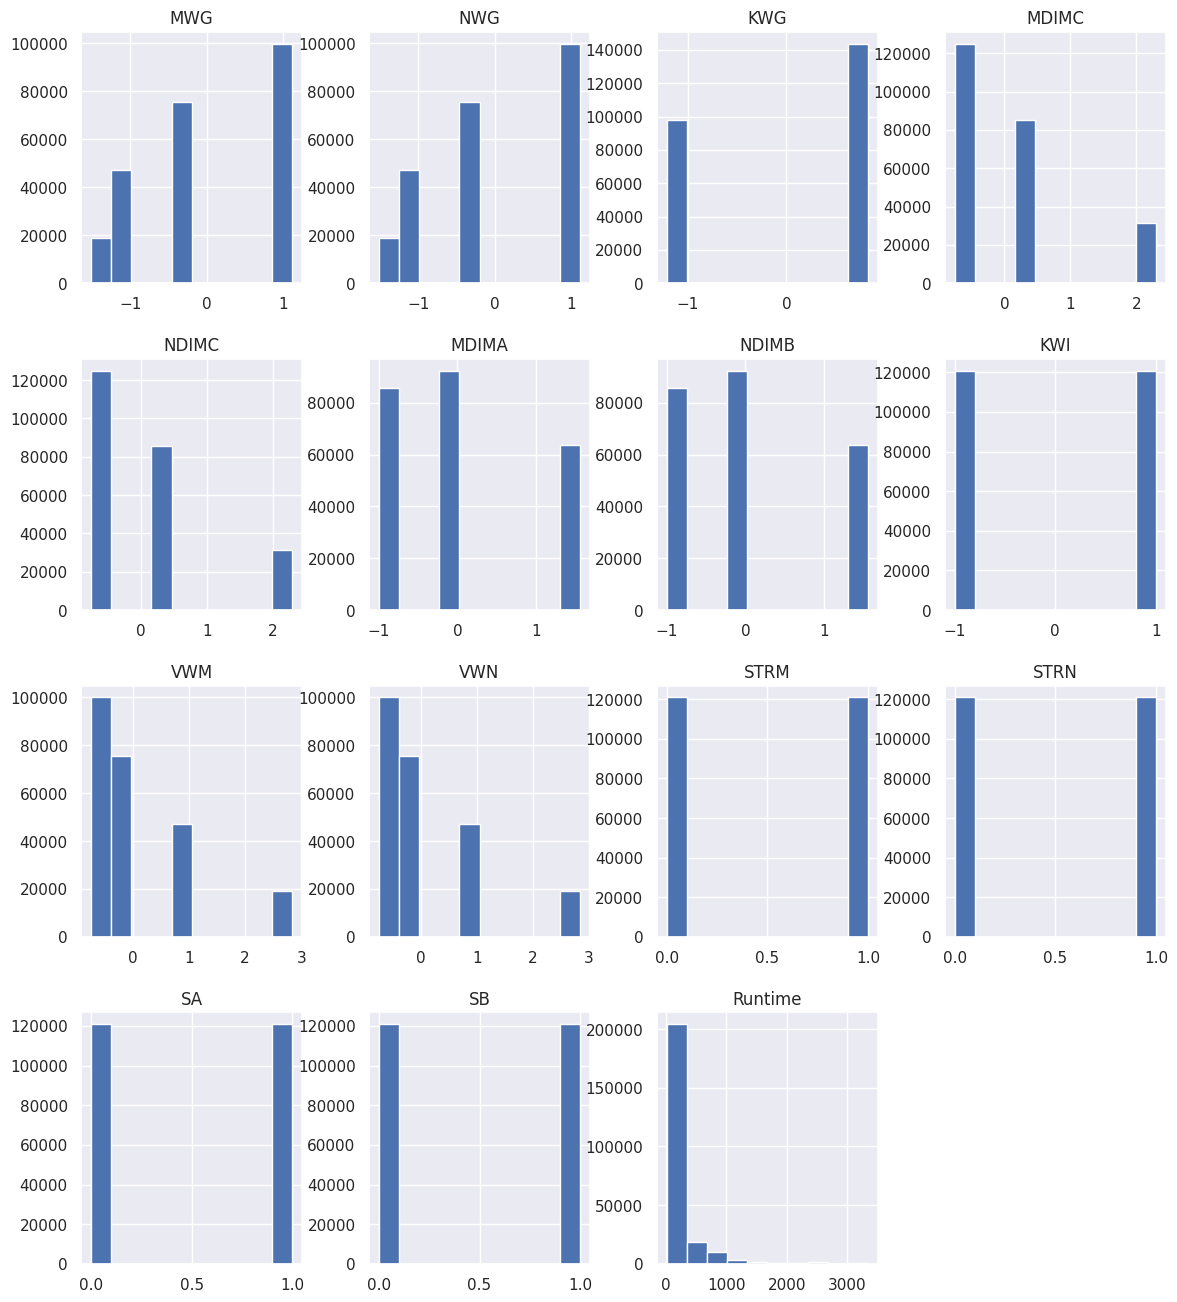

In [ ]:
for index in range(10):
    df.iloc[:,index] = (df.iloc[:,index]-df.iloc[:,index].mean()) / df.iloc[:,index].std();
df.hist(figsize= (14,16));

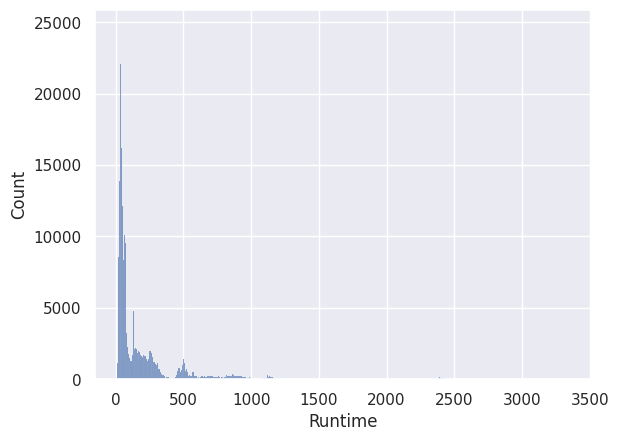

In [ ]:
#plotting the distribution of Runtime
sns.histplot(df['Runtime']);

#### Making two different objects one which holds all the features and other which holds our target or dependent variable.
We have used minmax scaler on the our target variable so that we will have same range with the predicted data from the model and our y

In [ ]:
features = (df[df.columns[:-1]].values)
target = sklearn.preprocessing.minmax_scale(df["Runtime"], feature_range=(0, 1), axis=0, copy=True)

#### Calling train test split function of the scikit-learn to divide the data into two parts where 80% of the data lies in training and rest 20% in the testing.

In [ ]:
train_features,test_features,train_target,test_target= train_test_split(features, target, test_size = 0.2,random_state=100)

In [ ]:
train_features.shape, test_features.shape, train_target.shape, test_target.shape

((193280, 14), (48320, 14), (193280,), (48320,))

## Linear Regression

In [33]:
lr = LinearRegression()
lr.fit(train_features, train_target)
y_pred = lr.predict(test_features)
mse = np.sqrt(mean_squared_error(test_target, y_pred))
r2 = r2_score(test_target, y_pred)
print("Root Mean Squared Error: ", mse)
print("R2 score: ", r2)

Root Mean Squared Error:  0.08419774614594629
R2 score:  0.4073238748151028


## Ridge Regression

In [34]:
ridge = Ridge()
ridge.fit(train_features, train_target)
y_pred = ridge.predict(test_features)
mse = np.sqrt(mean_squared_error(test_target, y_pred))
r2 = r2_score(test_target, y_pred)
print("Root Mean Squared Error: ", mse)
print("R2 score: ", r2)

Root Mean Squared Error:  0.08419774040033402
R2 score:  0.4073239557029472


## Random Foreset Regression

In [35]:
random_forest = RandomForestRegressor()
random_forest.fit(train_features, train_target)
y_pred = random_forest.predict(test_features)
mse = np.sqrt(mean_squared_error(test_target, y_pred))
r2 = r2_score(test_target, y_pred)
print("Root Mean Squared Error: ", mse)
print("R2 score: ", r2)

Root Mean Squared Error:  0.001211328081019181
R2 score:  0.9998773295182674


## KNN

In [36]:
knn = KNeighborsRegressor()
knn.fit(train_features, train_target)
y_pred = knn.predict(test_features)
mse = np.sqrt(mean_squared_error(test_target, y_pred))
r2 = r2_score(test_target, y_pred)
print("Root Mean Squared Error: ", mse)
print("R2 score: ", r2)

Root Mean Squared Error:  0.02623101059851558
R2 score:  0.9424763352822734


## Gradient Boosting

In [37]:
gradient_boost = GradientBoostingRegressor()
gradient_boost.fit(train_features, train_target)
y_pred = gradient_boost.predict(test_features)
mse = np.sqrt(mean_squared_error(test_target, y_pred))
r2 = r2_score(test_target, y_pred)
print("Root Mean Squared Error: ", mse)
print("R2 score: ", r2)

Root Mean Squared Error:  0.05161500737952261
R2 score:  0.7772752459657782
